In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
data=pd.read_csv("iris.csv")

In [337]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [339]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


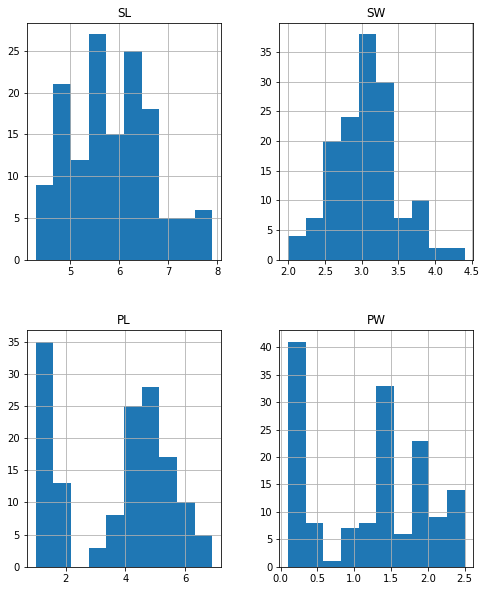

In [340]:
freqgraph=data.select_dtypes(include=["float"])
freqgraph.hist(figsize=(8,10))
plt.show()

# NULL VALUES

In [341]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [342]:
for i in ['SL','SW','PL']:
      data[i]=data[i].fillna(data[i].mean())

In [343]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# OUTLIERS

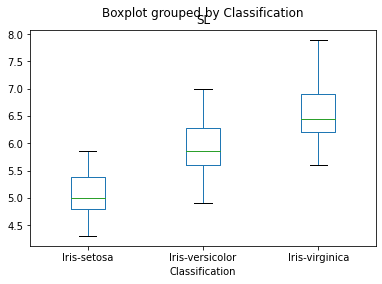

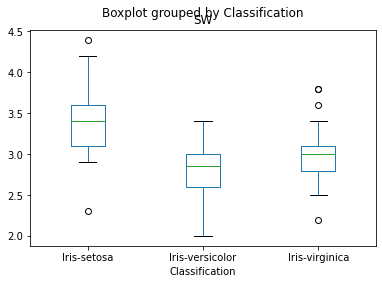

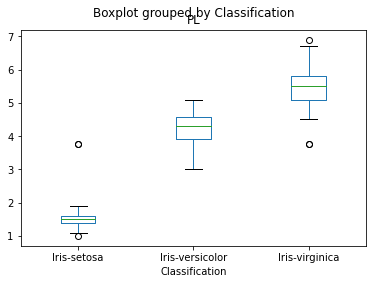

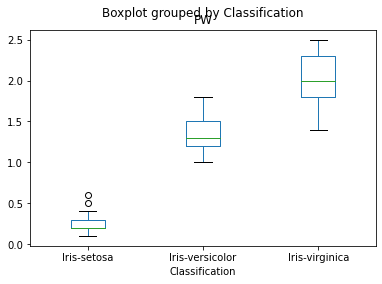

In [344]:
#visualize using box plot
data.boxplot(by ='Classification', column =['SL'],grid = False);
data.boxplot(by ='Classification', column =['SW'], grid = False);
data.boxplot(by ='Classification', column =['PL'], grid = False);
data.boxplot(by ='Classification', column =['PW'], grid = False);

<AxesSubplot:xlabel='SW'>

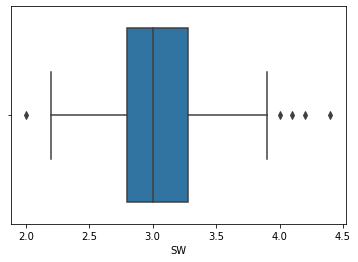

In [345]:
sns.boxplot(x='SW', data=data)

In [348]:
Q1= np.percentile(data["SW"],25,interpolation="midpoint")
Q2= np.percentile(data["SW"],50,interpolation="midpoint")
Q3= np.percentile(data["SW"],75,interpolation="midpoint")
print("Q1:",Q1,"\n")
print("Q2:",Q2,"\n")
print("Q3:",Q3,"\n")

Q1: 2.8 

Q2: 3.0 

Q3: 3.25 



In [349]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 0.4500000000000002 



In [350]:
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print("low_limit:",low_limit,"\n")
print("upper_limit:",upper_limit,"\n")

low_limit: 2.1249999999999996 

upper_limit: 3.9250000000000003 



In [351]:
outlier=[]
for x in data["SW"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
print('outlier values are: ',outlier)

outlier values are:  [4.0, 4.4, 4.1, 4.2, 2.0]


In [352]:
data['SW']=np.where(data['SW']>upper_limit,upper_limit,np.where(data['SW']<low_limit,low_limit,data['SW']))

<AxesSubplot:xlabel='SW'>

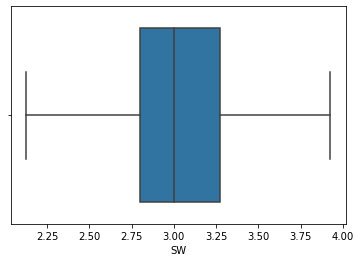

In [353]:
sns.boxplot(x='SW', data=data)

In [354]:
d1=data[['SL','SW','PL','PW']]

In [355]:
corr=d1.corr()
corr

,SL,SW,PL,PW
SL,1.000000,-0.100153,0.831400,0.800726
SW,-0.100153,1.000000,-0.411147,-0.336800
PL,0.831400,-0.411147,1.000000,0.936389
PW,0.800726,-0.336800,0.936389,1.000000


# label encoding 

In [356]:
from sklearn.preprocessing import LabelEncoder

In [357]:
label_encoder=LabelEncoder()

In [358]:
data["Classification"]=label_encoder.fit_transform(data["Classification"])

In [359]:

 
data['Classification'].unique()

array([0, 1, 2])

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


splitting the data

In [361]:
X=data.drop(["Classification"],axis=1)

In [362]:
y=data["Classification"]

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
from sklearn.preprocessing import StandardScaler

In [364]:
sc=StandardScaler()

In [365]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [366]:
X_train.shape

(120, 4)

In [367]:
X_test.shape

(30, 4)

# Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

LOgistic Regression

In [368]:
import time
from sklearn.linear_model import LogisticRegression
start_time = time.time()
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_predict=logit_model.predict(X_test)

end_time = time.time()

In [369]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
accuracy_score(y_predict,y_test)

0.9666666666666667

In [370]:
confusion_matrix(y_predict,y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [371]:
time_taken = end_time - start_time
time_taken

0.04004979133605957

# KNN

In [372]:
from sklearn.neighbors import KNeighborsClassifier

In [373]:
start_time = time.time()
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(X_train,y_train)
    y_predict=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
end_time = time.time()

In [374]:
acc_values

[1.0,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

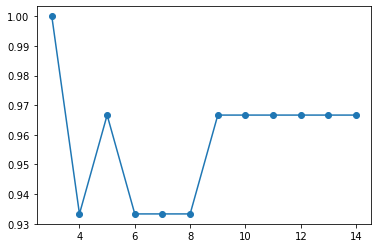

In [375]:
plt.plot(neighbors,acc_values,"o-")

In [376]:
start_time=time.time()
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
end_time=time.time()


In [377]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [378]:
time_taken = end_time - start_time
time_taken

0.01641392707824707

# DecisionTreeClassifier

In [379]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_predict=dt_model.predict(X_test)
end_time=time.time()
accuracy_score(y_test,y_predict)

0.9666666666666667

In [380]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [381]:
time_taken = end_time - start_time
time_taken

0.010070085525512695

# SVM

In [390]:
from sklearn.svm import SVC

In [391]:
start_time = time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
end_time = time.time()

In [392]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [393]:
time_taken = end_time - start_time
time_taken

0.008170604705810547

In [394]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

RADIAL SVM

In [395]:
start_time = time.time()
svm_linear=SVC(kernel='rbf')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
end_time = time.time()

In [396]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [397]:
time_taken = end_time - start_time
time_taken

0.008003711700439453

# RANDOMFORESTCLASSIFIER

In [321]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
start_time=time.time()
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_predict=RFC.predict(X_test)
end_time=time.time()

In [323]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [324]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [325]:
time_taken=end_time-start_time
time_taken

0.250136137008667

# GRADIENTBOOSTINGCLASSIFIER

In [326]:
from sklearn.ensemble import GradientBoostingClassifier

In [327]:
start_time=time.time()
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_predict=GBC.predict(X_test)
end_time=time.time()

In [328]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [329]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [330]:
time_taken = end_time - start_time
time_taken

0.36293745040893555

# The classification model which gives the best result is with respect to accuracy score and time is SVM